In [2]:
from numpy import log,sin,cos,pi,exp,tan

def calc_one(r,b,m,phi):
    print(b/(r*(sin(phi)-m*cos(phi))))
    return log(b/(r*(sin(phi)-m*cos(phi))))/b

calc_one(1,0.1,0.1,0.01)

-1.1111707845935506


nan

In [119]:
import numpy as np
import matplotlib.pyplot as plt
class LogSpiral:
    def __init__(self, psi, xh=1):
        rad_psi = psi*np.pi/180
        self.k = 1/np.tan(rad_psi)
        def func(theta):
            return xh*np.exp(self.k*theta)
        self.rad_psi = rad_psi
        self.func = func
        self.xh = xh
    
    def plot_spiral(self, theta_range):
        fig,ax = plt.subplots(1)
        x_spiral = np.cos(theta_range)*self.func(theta_range)
        y_spiral = self.func(theta_range)*np.sin(theta_range)
        ax.plot(x_spiral, y_spiral, linestyle='-', marker=' ')
        ylims = ax.get_ylim()
        ax.set_ylim(0,ylims[1])
        ax.set_aspect('equal')
        for y_final in np.linspace(0, y_spiral[-1], 10):
            print(y_final)
            ax.plot([0, x_spiral[-1]*2], [0, y_final], linestyle = '-', marker=' ', color='black')


class LogSpiralMirror:
    def __init__(self, xstart, xend, psi):
        self.xstart = xstart
        self.theta_start = 0
        self.xend = xend
        self.psi = psi
        self.psi_rad = np.pi/180*psi
        self.k = 1/np.tan(self.psi_rad)
        self.function = lambda theta: np.cos(theta)*self.xstart*np.exp(self.k*theta)-self.xend
        self.derivative = lambda theta: self.xstart*np.exp(self.k*theta)*(np.cos(theta)*self.k-np.sin(theta))

    def return_r(self, theta):
        return self.xstart*np.exp(self.k*theta)

    def return_cart_coords(self, theta):
        r = self.return_r(theta)
        x = np.cos(theta)*r
        y = np.sin(theta)*r
        return x,y

    def return_prelim_theta(self):
        prelim_theta = np.log(self.xend/self.xstart)*1/self.k
        return prelim_theta

    def return_precise_theta(self, max_iterations=10, precision=10**-5):
        x_0 = self.return_prelim_theta()
        for k in range(max_iterations):
            x_n = x_0 - self.function(x_0)/self.derivative(x_0)

            if abs(x_0-x_n) < precision:
                return x_n
            x_0 = x_n
        return None

    def update_theta_end(self, max_iterations=10, precision=10**-5):
        self.theta_end = self.return_precise_theta(max_iterations=max_iterations, precision=precision)

    def return_equiv_line(self):
        xstart = self.xstart
        ystart = 0
        theta = self.return_precise_theta() 
        xend,yend = self.return_cart_coords(theta)



In [120]:
%matplotlib qt
L = LogSpiralMirror(1,2,1)
L.update_theta_end(precision=10**-6)
print(L.theta_end)
L.return_cart_coords(L.theta_end)

0.012100206914398618


(2.0, 0.02420159499923009)

In [116]:
# test case 
xs = 1
xe = 2
psi = 1#deg
psi_rad = np.pi/180*psi
k = 1/np.tan(psi_rad)
prelim_theta_end = np.log(xe/xs)/k
function = lambda theta: np.cos(theta)*xs*np.exp(k*theta)-xe
derivative = lambda theta: xs*np.exp(k*theta)*(np.cos(theta)*k-np.sin(theta))


print(prelim_theta_end)

def newton(x0, func, deriv, prec=0.00000000001):
    for k in range(100):
        xn = x0 - func(x0)/deriv(x0)
        print('x0', x0, 'xn', xn)
        if abs(xn-x0) < prec:
            print('iterations {}'.format(k))
            return xn
        x0 = xn
    return None
theta_range = np.linspace(0,prelim_theta_end*2,100)
fig,ax = plt.subplots(1)
ax.plot(theta_range,function(theta_range),linestyle='-', marker=' ')
ax.plot([0,0.025],[newton(prelim_theta_end, function, derivative),newton(prelim_theta_end, function, derivative)])


0.012098929041484803
x0 0.012098929041484803 xn 0.012100206961151709
x0 0.012100206961151709 xn 0.012100206914398618
x0 0.012100206914398618 xn 0.012100206914398618
iterations 2
x0 0.012098929041484803 xn 0.012100206961151709
x0 0.012100206961151709 xn 0.012100206914398618
x0 0.012100206914398618 xn 0.012100206914398618
iterations 2


In [89]:

def newton_spiral(phi,r,b,m,t):
    return r*exp(b*phi)*(sin(phi)-m*cos(phi))-t 
def newton_der_spiral(phi,r,b,m,t):
    return r*b*exp(b*phi)*(sin(phi)-m*cos(phi)) + r*exp(b*phi)*(cos(phi)+m*sin(phi))
def newtonit(x,params):
    '''
    everybodys beloved newton thingy
    x_n+1 = x_n -f(x_n)/f'(x_n)
    '''
    x_old = float('Inf')
    while True:
        if abs(x-x_old) < 10**-3:
            break
        x_old = x
        x = x_old-newton_spiral(x_old,*params)/newton_der_spiral(x_old,*params)
        print(x_old)
    return x


rotations = 1
m= -0.1
angle = 15#deg
b = 1/tan(angle*pi/180)
print(b)
r = 1
t = 1
phis = np.linspace(-rotations*2*pi,rotations*2*pi,101*rotations)
params = [r,b,m,t]

fig,ax = plt.subplots(1)
ax.plot(phis,newton_spiral(phis,r,b,m,t),linestyle = '-',marker = ' ')
ax.plot(phis,newton_der_spiral(phis,r,b,m,t),linestyle = '-',marker = ' ',color = 'black')
ax.hlines(0,0,rotations*2*pi)
ax.set_ylim(-10,10)
ax.set_xlim(-20,20)


phi_inter = newtonit(0,params)
r_inter = log_spiral(phi_inter,r,b)
print(phi_inter,r_inter)

ax.set_title(round(phi_inter*180/pi,4))
ax.vlines(newtonit(0,params),-2,2)
ax.vlines(newtonit(4,params),-2,2)

params = [r,b,m,t]
#(newtonit(3,params))-(newtonit(1,params))
fig,ax = plt.subplots(1)
ax.plot(*log_spiral(phis,r,b),linestyle = '-',marker = ' ')
ax.plot(np.linspace(0,40,101),mxt(np.linspace(0,40,101),m,t),linestyle = '-',marker = ' ')
ax.plot([0,r_inter[0]],[0,r_inter[1]],linestyle = '-',marker = ' ')
ax.set_ylim(-20,20)
ax.set_xlim(-20,20)

3.7320508075688776
0
0.6554010122828375
0.4730702054332011
0.3432435284111798
0.2824386989841595
0.2711896803455817
0.27085609879452566 (2.64774867776953, 0.7352269223831615)
0
0.6554010122828375
0.4730702054332011
0.3432435284111798
0.2824386989841595
0.2711896803455817
4
3.774522117386749
3.568065876022619
3.384712728414591
3.2316687202272667
3.1197945836459113
3.059357182047506
3.042977108798022
3.041916534349557


(-20.0, 20.0)

In [21]:
sin(phi),cos(phi)

(0.7071067811865475, 0.7071067811865476)

(array([1.        , 1.08231725, 1.17080377, 1.26586747, 1.36793791,
       1.47746677, 1.59492838, 1.7208201 , 1.85566259, 2.        ]), array([0.        , 0.02463461, 0.05332494, 0.0865568 , 0.12486607,
       0.16884333, 0.21913887, 0.27646822, 0.34161807, 0.41545266]))


(0.4154526570748603, -0.41545265707486034)

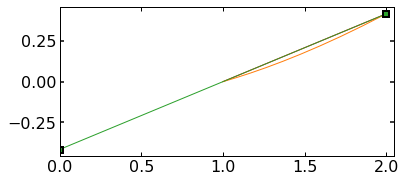

In [1]:
import LogSpiralCalc as lgs
l = lgs.LogSpiral(1, 2, 16)
l.return_equiv_line(plot=True)